# Assignment 1 - APIs

<div class="alert alert-block alert-info">
<p>I've set this up as a partially autograded assignment.</p>
 
<p>The points grading is mainly for you to see where you are going right and going wrong, and to tell me where to take a closer look. You won't be penalized just because your output doesn't match what the autograder expects.</p>
    
<p>In practice, I'll grade holistically rather than a question-by-question basis, using a check, check- and check+ scale.</p>
</div>

Please help me grade by observing the following:
 
* Do not rename this notebook (that messes up the autograder)
* Do not include large sections of output (that makes it hard to find your code). For example, use `df.head()` to show the first few rows, rather than printing an entire dataframe. The same goes for printing long strings.

### Policy on ChatGPT and similar LLMs

ChatGPT and similar tools can be useful in trying to figure out the syntax for a complex command, or to understand and fix an error. However, if you jump directly to ChatGPT for an answer, that means you aren't learning anything. 

Therefore, you may you use ChatGPT or a similar tool for this homework if you:
- clearly acknowledge when and how you used the tool (e.g., "I got a syntax error when trying to join the two dataframes, and asked ChatGPT for help")
- attempt the question on your own first, and try to fix any errors. Include your original attempts in your submission (you can comment out the lines that don't work)
- briefly discuss what you learned from ChatGPT (e.g., "I learned that function definitions need a colon (:) after the def statement."). Don't just uncritically accept ChatGPT's answer - learn from it!

If you have any questions, talk to the instructor before you submit.

### Start of homework assignment
What is your name (it's not always easy to match your GitHub account name to you.)

We saw the [BART API](http://api.bart.gov/docs/overview/index.aspx) in class. 

The first question asks you to extract some station information from the API.

Create a pandas dataframe (call it `stationdf`) of all stations, including their name, lat/lon, and the other information that is returned from the station information API.



In [ ]:
# You'll need a few lines of code that looks something like this
stationdf = 999 # replace 999 with your code here
print(stationdf)

### BEGIN SOLUTION
import json
import pandas as pd
import requests

APIkey = 'XXXXX'  # enter your API key 

# look for station codes
requestString = 'http://api.bart.gov/api/stn.aspx?cmd=stns&key={}&json=y'.format(APIkey)

# looking step by step at the output, 
# we see that the information is nested first in root, 
# then in stations, then in station

r = requests.get(requestString)
d = json.loads(r.text)
stns = d['root']['stations']['station']

# convert to a dataframe
stationdf = pd.DataFrame(stns)
### END SOLUTION

In [ ]:
# Autograding tests - do not edit
print(stationdf.head())
assert len(stationdf) == 50
assert '12th St. Oakland City Center' in stationdf.name.values

What is the regular fare from Millbrae to Richmond? 

Extract the result from the API and store it in a variable called `fare`.

*Hint*: Look at your answer to the previous question to see the codes of each station.


In [ ]:
# your code here
fare = 999 # replace with your answer
print('The fare is ${}'.format(fare))

### BEGIN SOLUTION

# to be clever, we'd extract the station names directly from the station dataframe
orig, dest = 'MLBR', 'RICH'

requestString = 'http://api.bart.gov/api/sched.aspx?cmd=fare&key={}&orig={}&dest={}&json=y'.format(APIkey, orig, dest)
r = requests.get(requestString)
d = json.loads(r.text)

# Looking at d, the fare is buried down in root, then in trip, then in fare
fare = d['root']['trip']['fare']
print('The fare is ${}'.format(fare))
### END SOLUTION


In [ ]:
# Autograding tests - do not edit
print(fare)
assert float(fare) == 7.3

Now, create a function that will return the fare to Millbrae from any station.

Call your function `millbrae_fare()`. It should have one argument, `orig`, and return the fare.

*Hint*: Use all your code to the answer above, but indent it and put it in a function. Then, use the variable `orig` instead of your hard-coded station code for Richmond.

In [ ]:
### your code here

def millbrae_fare(orig):
    # contents of your function here
    fare = 999 # replace with your code here
    return fare

# example
print('Fare from Civic Center to Millbrae is ${}'.format(millbrae_fare('CIVC')))

### BEGIN SOLUTION
def millbrae_fare(orig):
    dest = 'MLBR'
    requestString = 'http://api.bart.gov/api/sched.aspx?cmd=fare&key={}&orig={}&dest={}&json=y'.format(APIkey, orig, dest)
    r = requests.get(requestString)
    d = json.loads(r.text)
    fare = d['root']['trip']['fare']
    return fare
print('Fare from Richmond to Millbrae is ${}'.format(millbrae_fare('RICH')))

### END SOLUTION

In [ ]:
# Autograding tests - do not edit
print(millbrae_fare('RICH'), millbrae_fare('WARM'))
assert str(millbrae_fare('RICH')) == '7.30'
assert str(millbrae_fare('WARM')) == '9.65'

In the second part of the homework, let's look at getting census data through the Census API.

The variables available through the API for the 2023 1-year ACS <a href="https://api.census.gov/data/2023/acs/acs1/variables.html">are listed here</a>. Take 15 minutes to explore what variables and tables are available.

Query the API to obtain MEDIAN HOUSEHOLD INCOME for all households (i.e., not disaggregated by race and ethnicity) at the **state** level. Store the results in a pandas dataframe called `incomedf`. Rename the column that holds the income data to `median_hh_income`.

In [ ]:
# You'll need a few lines of code that looks something like this
incomedf = 999 # replace 999 with your code here
print(incomedf)

### BEGIN SOLUTION
import json
import requests
import pandas as pd

r = requests.get('https://api.census.gov/data/2023/acs/acs1?get=NAME,B19013_001E&for=state', params={'key':'6ca3d9bff2bba551415a0d0ca00b4b9bbb04f854'})
censusdata = r.json()
incomedf = pd.DataFrame(censusdata[1:], columns=censusdata[0])
incomedf.rename(columns={'B19013_001E':'median_hh_income'}, inplace=True)
incomedf.median_hh_income = incomedf.median_hh_income.astype(int)
print(incomedf.head())

### END SOLUTION

In [ ]:
# Autograding tests - do not edit
assert len(incomedf) == 52 # there should be 52 states, including DC and Puerto Rico
assert incomedf.loc[incomedf.state=='06','median_hh_income'].astype(int).values==95521

What's the average (mean) of these state-level median incomes? Store the mean in a variable called `mean_income`.

In [ ]:
mean_income = 999 # your code here

### BEGIN SOLUTION
mean_income = incomedf.median_hh_income.astype(float).mean()
### END SOLUTION

In [ ]:
# Autograding tests - do not edit
assert mean_income.round() == 76590
print(mean_income)

Now, let's map these results. Using `pygris`, add the state boundaries to your dataframe. Keep the name as `incomedf`.

If `pygris` is still not working, you can use the workaround in the solutions to the Class 1 notebook - download the boundary file to your computer and use the `read_file` function in `geopandas` to load it in.


In [ ]:
# your code here

### BEGIN SOLUTION
import pygris
import geopandas as gpd
try:
    states = pygris.states(year=2023)
except:
    states = gpd.read_file('/Users/adammb/Downloads/tl_2024_us_state')
    states.set_index('STATEFP', inplace=True)
    states.index.name='state'

incomedf = states[['geometry']].join(incomedf.set_index('state'))
print(incomedf.head())
### END SOLUTION


In [ ]:
# Autograding tests - do not edit
assert 'geometry' in incomedf.columns

Finally, plot median household income at the state level. Include a basemap using `contextily` (follow the example from class).

If you are inclined, see if you can figure out some of the other `contextily` and plotting options, such as transparency (alpha), colormaps, zoom levels, and so on.

*Hint:* You will probably want to restrict to the continental US, for clarity. You could try something like:

`incomedf = incomedf[pd.notnull(incomedf['NAME'])] # drops geographies with Null names`
`incomedf = incomedf[~incomedf['NAME'].isin(['Hawaii','Alaska','Puerto Rico'])] # drops geographies with these names`

or

`incomedf = incomedf[incomedf.state.astype(int)<60] # drops where the fips code is >=60`

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

# your code here

### BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(10,5))
incomedf = incomedf[pd.notnull(incomedf['NAME'])] 
incomedf = incomedf[~incomedf['NAME'].isin(['Hawaii','Alaska','Puerto Rico'])]
incomedf.to_crs('3857').plot('median_hh_income', ax=ax, cmap='plasma', legend=True)

ctx.add_basemap(ax)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Median Household Income')

fig.savefig('/Users/adammb/Desktop/usincome.jpg')
### END SOLUTION

Your final product should look something like this, although if you are inclined, you could do a better job in arranging the color bar, adjusting the transparency and other settings, etc.
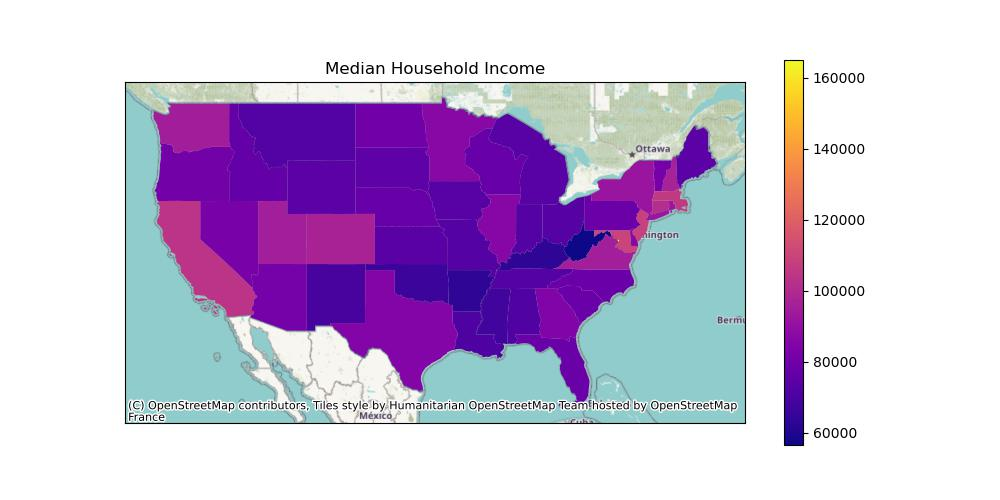

# Challenge Problem
Remember, you need to do at least two of these challenge problems during the quarter.

Look at the US EPA [AirNow API](https://docs.airnowapi.org). You'll need to register for your own API key - click on Log In and follow the steps to request an account. You'll get your key within a minute.

Once you a logged in, look at the Web Services, and then Observations by Monitoring Site. If you click on the Query Tool, you can build up a query in the point-and-click interface. This will help you understand the API syntax.

Back in Python, use the `requests` library to get all the data for PM 2.5 for each day in 2023 for a city or county of your choice (you might have to play around with the bounding box). Note that Los Angeles County will probably be too big, so choose another county or a part of LA. 

Return this data as a pandas dataframe.

Put this in a function that takes at least one argument. For example, you could write a function where you pass the year, or the pollutant type. Your function should return a dataframe with the results of your API query.

Then, map or plot the data in whatever way you choose (e.g. boxplots or line charts of pollution levels). 

If you want to map it, [here's some advice on how to convert a pandas dataframe into a geodataframe](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html), using the lat and lon columns returned by the API.                                                                           



In [ ]:
# your code here